##### 问题描述

大家好，我们在用 networkx 显示中文的时候，会发现不能显示中文。 

##### 解决办法

1. 下载Github仓库中的字体SimHei.ttf； 
2. 在 jupyter notebook 中执行
```python
import matplotlib
print(matplotlib.__path__)
```
找到 matplotlib 的路径，然后 cd 到这个路径。 cd 到这个路径之后，继续 cd，cd 到 mpl-data/fonts/ttf 这个路径。 然后把 `DejaVuSans.ttf` 这个文件换成我们刚刚下在的文件。 

```bash
$ mv SimHei.ttf DejaVuSans.ttf
```

其中，用到的 ttf 字体。 我给大家传到附件上了。 

Previous Course

1. What's the language model? OOV problem? 
2. Syntax Tree. lambda 

$$ pr(w) $$

## Out of Vocabulary(OOV)

Pr(w_o) = constant < Pr(w_1)

## Language Model: Smooth

In [5]:
import random

In [6]:
"""adj* => adj* adj | adj null"""

def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

def adj_star_2():
     return random.choice([lambda : '', lambda : adj() + adj_star_2()])()

def adj_star():
    return random.choice(['', ajd() + adj_star()])

In [7]:
lambda : adj() + adj_star_2()

<function __main__.<lambda>()>

In [8]:
numbers = [1, -2, -4, 1, 5, 6, 9, -11]

In [9]:
def absolute(number): 
    if number < 0: return -1 * number
    else:
        return number

In [10]:
absolute(-11)

11

In [11]:
mod_5(6)

NameError: name 'mod_5' is not defined

In [12]:
mod_5(7)

NameError: name 'mod_5' is not defined

In [ ]:
def mod_5(number): 
    return number % 5

sorted(numbers, key=lambda x: x % 5)

In [ ]:
mod_5_lambda = lambda x: x % 5

In [ ]:
mod_5

In [ ]:
mod_5_lambda(19)

In [ ]:
mod_5(19)

In [ ]:
adj_star_2()

## Search Policy

In [ ]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [ ]:
city_location = {
    '香港': (114.17, 22.28)
}

Input: String -> dict

In [ ]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [13]:
import re

In [14]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [15]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

NameError: name 'coordination_source' is not defined

In [ ]:
city_location

In [ ]:
import math

In [ ]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [ ]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [ ]:
get_geo_distance('上海', '杭州')

In [ ]:
import networkx as nx

In [ ]:
city_graph = nx.Graph()

In [ ]:
city_graph.add_nodes_from(list(city_location.keys()))

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [16]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

NameError: name 'nx' is not defined

In [ ]:
threshold = 300

In [ ]:
city_connection = defaultdict(list)

In [ ]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [ ]:
city_connection

In [ ]:
city_with_road = nx.Graph(city_connection)

In [ ]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [ ]:
g

In [ ]:
from collections import defaultdict

In [ ]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [ ]:
simple_connection_info = defaultdict(list)

In [17]:
simple_connection_info.update(simple_connection_info_src)

NameError: name 'simple_connection_info' is not defined

In [ ]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [ ]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [ ]:
bfs(number_grpah, 1)

In [ ]:
simple_connection_info['西安']

In [ ]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

In [ ]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [ ]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [ ]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [ ]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [ ]:
search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)

In [ ]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [ ]:
pretty_print(search('北京', '福州', simple_connection_info))

## Breath first search

## Depth first search

In [18]:
pretty_print(search('北京', '南京', city_connection))

NameError: name 'pretty_print' is not defined

In [ ]:
pretty_print(search('北京', '长沙', city_connection))

In [ ]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_stations_first))

In [ ]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_as_much_possible))

## Assignment

1. 网络爬虫 + 正则
2. 数据处理
3. 算法的应用能力

In [ ]:
import requests

In [ ]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [ ]:
response = requests.get(url)

In [ ]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [ ]:
pattern = re.compile(what_we_want)

In [ ]:
likes = pattern.findall(response.text)

In [ ]:
for like in likes:
    print(like)

## Machine Learning

In [19]:
from sklearn.datasets import load_boston

In [20]:
data = load_boston()

In [21]:
X, y = data['data'], data['target']

In [22]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [23]:
y[1]

21.6

In [24]:
len(X[:, 0])

506

In [25]:
len(y)

506

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

In [28]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

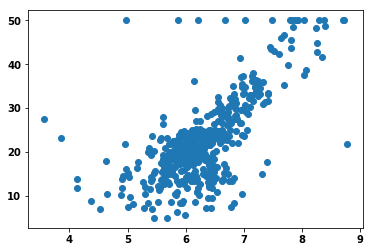

In [29]:
draw_rm_and_price()

In [30]:
import random

In [31]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

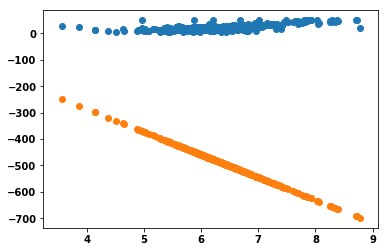

In [32]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

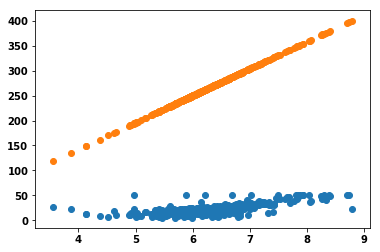

In [33]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

$$ \hat{y} $$

In [34]:
list(y)

[24.0,
 21.6,
 34.7,
 33.4,
 36.2,
 28.7,
 22.9,
 27.1,
 16.5,
 18.9,
 15.0,
 18.9,
 21.7,
 20.4,
 18.2,
 19.9,
 23.1,
 17.5,
 20.2,
 18.2,
 13.6,
 19.6,
 15.2,
 14.5,
 15.6,
 13.9,
 16.6,
 14.8,
 18.4,
 21.0,
 12.7,
 14.5,
 13.2,
 13.1,
 13.5,
 18.9,
 20.0,
 21.0,
 24.7,
 30.8,
 34.9,
 26.6,
 25.3,
 24.7,
 21.2,
 19.3,
 20.0,
 16.6,
 14.4,
 19.4,
 19.7,
 20.5,
 25.0,
 23.4,
 18.9,
 35.4,
 24.7,
 31.6,
 23.3,
 19.6,
 18.7,
 16.0,
 22.2,
 25.0,
 33.0,
 23.5,
 19.4,
 22.0,
 17.4,
 20.9,
 24.2,
 21.7,
 22.8,
 23.4,
 24.1,
 21.4,
 20.0,
 20.8,
 21.2,
 20.3,
 28.0,
 23.9,
 24.8,
 22.9,
 23.9,
 26.6,
 22.5,
 22.2,
 23.6,
 28.7,
 22.6,
 22.0,
 22.9,
 25.0,
 20.6,
 28.4,
 21.4,
 38.7,
 43.8,
 33.2,
 27.5,
 26.5,
 18.6,
 19.3,
 20.1,
 19.5,
 19.5,
 20.4,
 19.8,
 19.4,
 21.7,
 22.8,
 18.8,
 18.7,
 18.5,
 18.3,
 21.2,
 19.2,
 20.4,
 19.3,
 22.0,
 20.3,
 20.5,
 17.3,
 18.8,
 21.4,
 15.7,
 16.2,
 18.0,
 14.3,
 19.2,
 19.6,
 23.0,
 18.4,
 15.6,
 18.1,
 17.4,
 17.1,
 13.3,
 17.8,
 14.0,
 14.4,
 13.4,

In [35]:
price_by_random_k_and_b

[281.05,
 272.73400000000004,
 313.98999999999995,
 303.892,
 311.938,
 273.21999999999997,
 250.64799999999997,
 259.288,
 230.074,
 250.21599999999995,
 270.358,
 250.486,
 244.00600000000003,
 247.24599999999998,
 255.18400000000003,
 241.036,
 246.48999999999995,
 249.46000000000004,
 220.62400000000002,
 235.25800000000004,
 226.78000000000003,
 248.11,
 257.668,
 239.902,
 245.89600000000002,
 228.346,
 239.902,
 252.538,
 276.73,
 286.396,
 234.502,
 253.88799999999998,
 247.3,
 233.85399999999998,
 255.18400000000003,
 246.382,
 241.414,
 241.89999999999998,
 248.164,
 282.13,
 305.296,
 291.58,
 259.126,
 261.394,
 253.726,
 232.82800000000003,
 238.44399999999996,
 251.62,
 217.546,
 228.50800000000004,
 248.002,
 256.21000000000004,
 277.594,
 249.892,
 243.952,
 317.44599999999997,
 270.682,
 294.06399999999996,
 257.83,
 246.058,
 236.014,
 248.164,
 274.624,
 291.14799999999997,
 309.616,
 265.66,
 238.498,
 243.41200000000003,
 228.07600000000002,
 243.78999999999996,
 2

In [36]:
[1, 1, 1]
[2, 2, 2]

[2, 2, 2]

## loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [37]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## First-Method: Random generation: get best k and best b

In [38]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 28.929771266949842 best_b: 36.905298064956895, and the loss is: 38726.05790183909
When time is : 1, get best_k: 18.992897350338268 best_b: -43.109238054325935, and the loss is: 2977.785536664142
When time is : 2, get best_k: 5.75998323958855 best_b: -9.138818447472858, and the loss is: 69.60450753630668
When time is : 87, get best_k: 12.723815117510014 best_b: -58.804000298144786, and the loss is: 51.946268412692476


In [39]:
10 ** 0.5

3.1622776601683795

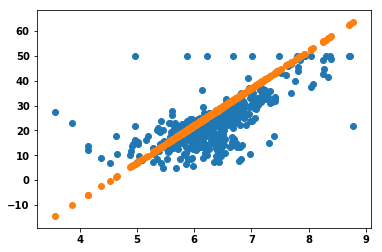

In [40]:
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 2nd-Method: Direction Adjusting

In [41]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

update_time = 0

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 10, get best_k: -50.7697851641648 best_b: 0.4954652091680145, and the loss is: 118163.64012053152
When time is : 20, get best_k: -49.76978516416479 best_b: -0.5045347908319855, and the loss is: 114527.81270180712
When time is : 30, get best_k: -48.76978516416477 best_b: -1.504534790831986, and the loss is: 110948.82539473109
When time is : 40, get best_k: -47.76978516416476 best_b: -2.5045347908319866, and the loss is: 107426.67819930307
When time is : 50, get best_k: -46.769785164164745 best_b: -3.5045347908319875, and the loss is: 103961.37111552339
When time is : 60, get best_k: -45.76978516416473 best_b: -4.504534790831986, and the loss is: 100552.90414339186
When time is : 70, get best_k: -44.769785164164716 best_b: -5.504534790831983, and the loss is: 97201.27728290843
When time is : 80, get best_k: -43.7697851641647 best_b: -6.504534790831979, and the loss is: 93906.49053407341
When time is : 90, get best_k: -42.76978516416469 best_b: -7.5045347908319755, and the 

如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

#### 找对改变的方向

#### 如何找对改变的方向呢？ 

#### 2nd-method: 监督让他变化--> 监督学习

## loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$
$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [42]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## 导数

In [43]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [44]:
#from icecream import ic

ModuleNotFoundError: No module named 'icecream'

In [52]:
trying_times = 2000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 13.73021483583562 best_b: -64.00453479083262, and the loss is: 139640.83916824558
When time is : 50, get best_k: 13.73021483583562 best_b: -64.00453479083262, and the loss is: 61350.347302537
When time is : 100, get best_k: 13.73021483583562 best_b: -64.00453479083262, and the loss is: 26969.370020798273
When time is : 150, get best_k: 13.73021483583562 best_b: -64.00453479083262, and the loss is: 11871.09175181941
When time is : 200, get best_k: 13.73021483583562 best_b: -64.00453479083262, and the loss is: 5240.7385952922305
When time is : 250, get best_k: 13.73021483583562 best_b: -64.00453479083262, and the loss is: 2329.0430636443944
When time is : 300, get best_k: 13.73021483583562 best_b: -64.00453479083262, and the loss is: 1050.3821122860322
When time is : 350, get best_k: 13.73021483583562 best_b: -64.00453479083262, and the loss is: 488.86218594638046
When time is : 400, get best_k: 13.73021483583562 best_b: -64.00453479083262, and the loss is: 

In [ ]:
y = 10

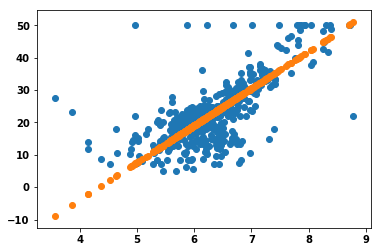

In [53]:
X_rm = X[:, 5]
k = 11.431551629413757
b = -49.52403584539048
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## Breaking: 10:03 PM Continue :)

In [ ]:
loss([1, 1, 1], [2, 2, 3])

In [ ]:
import time

In [ ]:
for i in range(100):
    print('R U ready?')
    time.sleep(1)

In [ ]:
loss([1, 1, 1], [1, 1, 1])

In [ ]:
data['feature_names']

In [ ]:
data['DESCR']